## LInear regression examples

- Reference
    - http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py



In [4]:
## library類の読み込み
print(__doc__)

# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

Automatically created module for IPython interactive environment


In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [17]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ..., 
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
         310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
          97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
          85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
         265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,

In [16]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ..., 
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
         310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
          97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
          85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
         265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,

In [20]:
## ということで、diabetes.data, diabetes.targetがあるようですね。
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [24]:
## 442行10列
diabetes.data.shape

(442L, 10L)

In [19]:
diabetes.target

array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
        310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
         97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
         85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
        265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,
         53.,  190.,  142.,   75.,  142.,  155.,  225.,   59.,  104.,
        182.,  128.,   52.,   37.,  170.,  170.,   61.,  144.,   52.,
        128.,   71.,  163.,  150.,   97.,  160.,  178.,   48.,  270.,
        202.,  111.,   85.,   42.,  170.,  200.,  252.,  113.,  143.,
         51.,   52.,  210.,   65.,  141.,   55.,  134.,   42.,  111.,
         98.,  164.,   48.,   96.,   90.,  162.,  150.,  279.,   92.,
         83.,  128.,  102.,  302.,  198.,   95.,   53.,  134.,  144.,
        232.,   81.,  104.,   59.,  246.,  297.,  258.,  229.,  275.,
        281.,  179.,  200.,  200.,  173.,  180.,   84.,  121.,  161.,
         99.,  109.,

In [25]:
## 442行1列　→よって、diabetes.dataが説明変数、diabetes.targetが目的変数
diabetes.target.shape 

(442L,)

In [26]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2] #`diabetes.data`の`2`列目を抜き出し列で持っとく。

In [30]:
diabetes_X.shape

(442L, 1L)

In [39]:
# Split the data into training/testing sets for cross-validation
diabetes_X_train = diabetes_X[:-20] # training dataとして422行だけ取り出す
diabetes_X_test = diabetes_X[-20:]  # test dataとして20行残しておく

In [40]:
## 422行残っていることの確認
diabetes_X_train.shape

(422L, 1L)

In [41]:
## 20行残っていることの確認
diabetes_X_test.shape

(20L, 1L)

In [33]:
## こっちは20行だけ残しておく
diabetes_y_test = diabetes.target[-20:]

In [42]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [43]:
# 目的変数のtraining data部分のサイズ確認
diabetes_y_train.shape

(422L,)

In [44]:
# 目的変数のtest dataのサイズ確認
diabetes_y_test.shape

(20L,)

In [45]:
# Create linear regression object: モデル選定しとく
regr = linear_model.LinearRegression()

In [47]:
# Train the model using the training sets
# Ref. http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
# The coefficients
print'Coefficients: \n', regr.coef_

Coefficients: 
[ 938.23786125]


In [55]:
# The intercepts
regr.intercept_

152.91886182616167

上2つの文脈から、推定式は
$$
y = 938.23786125x + 152.91886182616167
$$

In [49]:
# The mean squared error
# `predict`メソッドで、上式をtestデータに当てはめた時の値を算出
# それを残しておいた`diabetes_y_test`と引き算してEuclid誤差を算出
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

Mean squared error: 2548.07


In [50]:
# Explained variance score: 1 is perfect prediction 決定係数の算出
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Variance score: 0.47


↑は式で書けば
$$
R^2 = 1-\frac{(yの真値-予測値)^2}{(yの真値-yの平均値)^2}
$$
となるが、これらは`diabetes_X_test, diabetes_y_test`とモデル`regr`の両者があれば実質は算出可能なので、上のようなメソッドの使い方になっている。

In [51]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

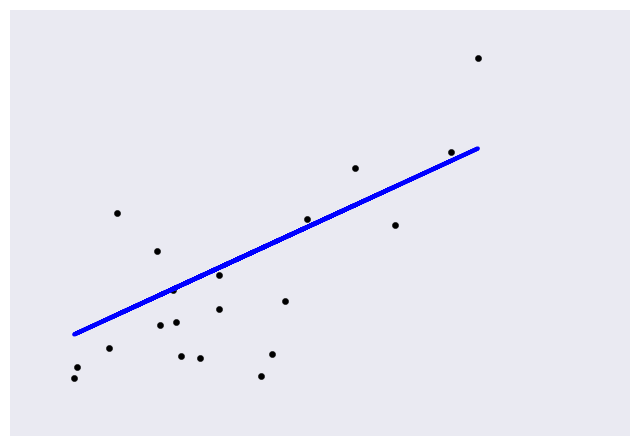

In [52]:
plt.xticks(())
plt.yticks(())

plt.show()